In [3]:
import pandas as pd

In [4]:
filepath = 'N_seaice_extent_daily_v3.0.csv'
data = pd.read_csv(filepath, usecols=[0, 1, 2, 3], skiprows=2, names=["YYYY", "MM", "DD", "Extent"])

display(data)

,YYYY,MM,DD,Extent
0,1978,10,26,10.231
1,1978,10,28,10.420
2,1978,10,30,10.557
3,1978,11,1,10.670
4,1978,11,3,10.777
...,...,...,...,...
15144,2024,10,25,7.299
15145,2024,10,26,7.494
15146,2024,10,27,7.534
15147,2024,10,28,7.364


In [5]:
filtered = data[(data["YYYY"].astype(int) >= 2002) & (data["YYYY"].astype(int) <= 2021)]
display(filtered)

,YYYY,MM,DD,Extent
6817,2002,1,1,13.590
6818,2002,1,2,13.628
6819,2002,1,3,13.598
6820,2002,1,4,13.623
6821,2002,1,5,13.683
...,...,...,...,...
14117,2021,12,27,12.950
14118,2021,12,28,12.976
14119,2021,12,29,12.990
14120,2021,12,30,13.090


In [6]:
filtered = filtered.copy()
filtered['datetime'] = pd.to_datetime(filtered[['YYYY', 'MM', 'DD']].astype(str).agg('-'.join, axis=1))
display(filtered)
filtered.set_index('datetime', inplace=True)
ice_annual = filtered.resample("YS").mean()
display(ice_annual)

,YYYY,MM,DD,Extent,datetime
6817,2002,1,1,13.590,2002-01-01
6818,2002,1,2,13.628,2002-01-02
6819,2002,1,3,13.598,2002-01-03
6820,2002,1,4,13.623,2002-01-04
6821,2002,1,5,13.683,2002-01-05
...,...,...,...,...,...
14117,2021,12,27,12.950,2021-12-27
14118,2021,12,28,12.976,2021-12-28
14119,2021,12,29,12.990,2021-12-29
14120,2021,12,30,13.090,2021-12-30


,YYYY,MM,DD,Extent
datetime,,,,
2002-01-01,2002.0,6.526027,15.720548,11.362866
2003-01-01,2003.0,6.526027,15.720548,11.397222
2004-01-01,2004.0,6.513661,15.756831,11.240434
2005-01-01,2005.0,6.526027,15.720548,10.906975
2006-01-01,2006.0,6.526027,15.720548,10.772614
2007-01-01,2007.0,6.526027,15.720548,10.474096
2008-01-01,2008.0,6.513661,15.756831,10.977847
2009-01-01,2009.0,6.526027,15.720548,10.931970
2010-01-01,2010.0,6.526027,15.720548,10.711392


# import matplotlib.pyplot as plt
fig, axs = plt.subplots()
x = ice_annual.index
y = ice_annual['Extent']

axs.plot(x, y, marker = 'o', c = 'darkblue', label = 'Annual Means')
axs.set_xlabel("Time", fontsize = 12)
axs.set_ylabel("Ice Index (", fontsize = 12)
axs.set_title("Change in Ice Index Over Time", fontsize = 15)

import matplotlib.dates as mdates 
axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  
axs.tick_params(axis='x', labelrotation=45) 

axs.legend()

In [7]:
from scipy import stats

ice_annual['time_1'] = ice_annual.index.year

#linear regression
ice_slope, ice_intercept, ice_r, ice_p, ice_stdarr = stats.linregress(ice_annual['time_1'], ice_annual['Extent'])

print(f"Slope: {ice_slope}")
print(f"R-value: {ice_r}")

Slope: -0.05223223962668849
R-value: -0.8170810737980169


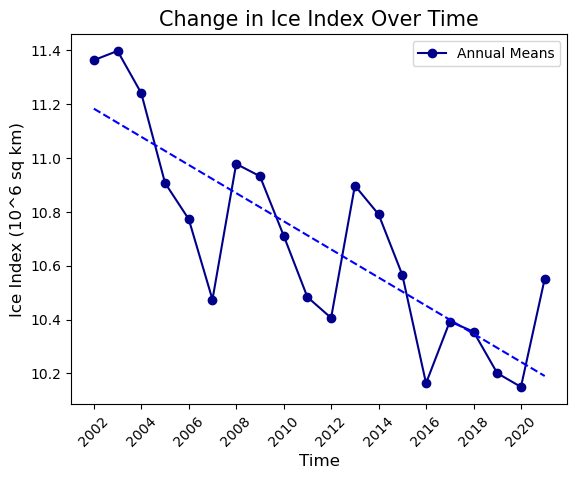

In [8]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots()
x = ice_annual.index
y = ice_annual['Extent']

axs.plot(x, y, marker = 'o', c = 'darkblue', label = 'Annual Means')
axs.set_xlabel("Time", fontsize = 12)
axs.set_ylabel("Ice Index (10^6 sq km)", fontsize = 12)
axs.set_title("Change in Ice Index Over Time", fontsize = 15)

import matplotlib.dates as mdates 
axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  
axs.tick_params(axis='x', labelrotation=45) 

axs.legend()

ice_fit = ice_annual['time_1'] * ice_slope + ice_intercept
axs.plot(ice_annual.index, ice_fit, '--', c = 'blue', label = 'Methane Fit')